<a href="https://www.kaggle.com/satendersiwach/haberman-patient-survival-dataset?scriptVersionId=84953718" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploratory Data Analysis

**1. Dataset Understanding**

1. The Dataset contains cases from a study which is conducted between 
1958 to 1970 at the University of Chicago's Billing Hospital on the survival of the patient who undergone surgery of breast cancer.

2. Dataset has 4 attributes [Patient Age, Operation Year, Auxillary Nodes and Survival Status]

3. Survival Status 1 means patient survived more than 5 years after surgery while 2 means patient survived less than 5 years after surgery.

4. Dataset is a child dataset but it can help you to understand the plots and other exploratory function helfull while building model.


**Objective**
 Predict if a patient will survive more than 5 year of less after surgery based on available attributes.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import warnings

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/habermans-survival-data-set/haberman.csv


In [2]:
# TO ignore or hide all the warnings
warnings.filterwarnings('ignore');

In [3]:
#Load haberman dataset
#So dataset has no column name, we have to set it mannualy
col_name=["patient_age","operation_year","axillary_nodes","survival_status"]
df = pd.read_csv('../input/habermans-survival-data-set/haberman.csv', names=col_name);

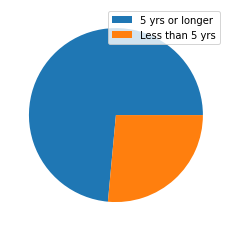

In [4]:
plt.pie(df.survival_status.value_counts())
plt.legend(['5 yrs or longer', 'Less than 5 yrs'])
plt.show()

**Observation(s)**

1. Total number of instance or records are 306

2. Patients who survived more than 5 years are 225.

3. Patients who survived less than 5 years are 81.

   So our dataset is imbalanced dataset.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
patient_age,306.0,52.457516,10.803452,30.0,44.0,52.0,60.75,83.0
operation_year,306.0,62.852941,3.249405,58.0,60.0,63.0,65.75,69.0
axillary_nodes,306.0,4.026144,7.189654,0.0,0.0,1.0,4.00,52.0
survival_status,306.0,1.264706,0.441899,1.0,1.0,1.0,2.00,2.0


**Observation(s)**
1. Average patient age is 52.
2. Minimum patient age is 30 and maximum patient age is 83
3. Axillary nodes are between 0 to 52.
4. Operation years are between 58 to 69.

# Scatter Chart

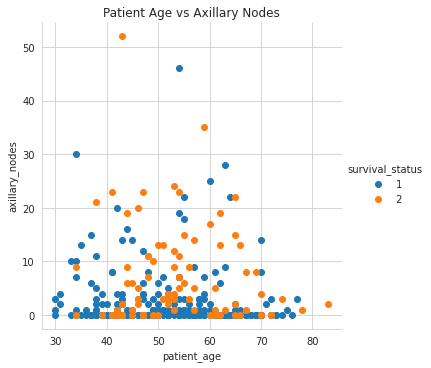

In [6]:
#so let's start from drawing a simple scatter chart to get some information from dataset.
#chart is survival status wise.
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="survival_status", height=5).map(plt.scatter, "patient_age", "axillary_nodes").add_legend()
plt.title("Patient Age vs Axillary Nodes")
plt.show()

**Observation(s)**

1. Patients have age<=40 chances of survival are more.
2. Increasing axillary nodes means survival chance less.


# Pair Plot

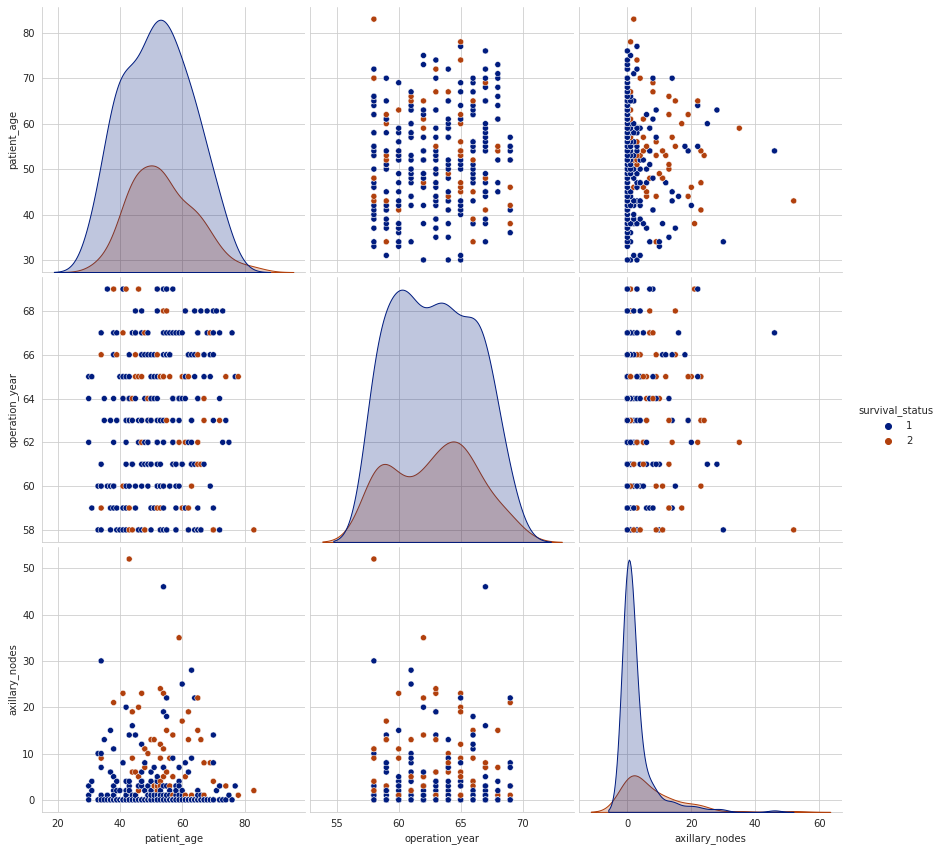

In [7]:
#let's draw pair-plot survival status wise to check which pair is significant with point distribution
plt.close()
sns.set_style("whitegrid")
sns.pairplot(df, hue="survival_status", diag_kind="kde", palette="dark",height=4)
plt.show()

**Observation(s)**
1. Based on above figure we can see that patient_age and axillary_nodes pair is most signigicant in point distribution compare to other pairs.
2. Patient with more than 50 axillary nodes or age >=80 is certainly not survived more than 5 years.
3. Axillary nodes<=5 then chances of survival are more.
4. Patient who had age below 40 have more chance to survive more than 5 year.


# Histogram

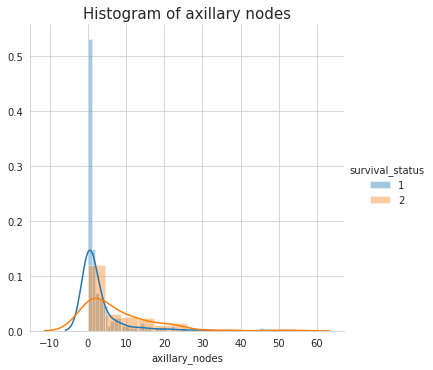

In [8]:
#Draw histogram to analysis axillary nodex
#lines shown on histogram is called probability density function or you may call it smooth histogram
plt.close()
sns.FacetGrid(df, hue="survival_status", height=5).map(sns.distplot, "axillary_nodes").add_legend()
plt.title('Histogram of axillary nodes', fontsize=15)
plt.show()

**Observation(s)**
1. If number of nodex is 0 then srvival chance of patient is very hight.
2. If number of nodes is <=4 then chance of survival more than 5 years are high.
3. If number of nodex is >50 then chance of survival is zero.

# Probability Density Function(PDF) & Cumulative Distribution Function(CDF)

In [9]:
#lets filter survival status and create new dataframe longer and shorter survival
survived_longer=df.loc[df["survival_status"]==1]
survived_shorter=df.loc[df["survival_status"]==2]

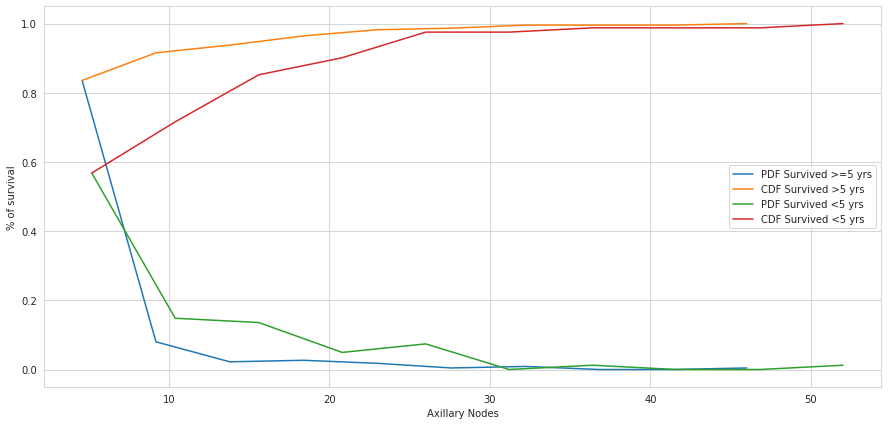

In [10]:
plt.close()
plt.figure(figsize=(15,7))
#return count and bin edges from numpy histogram for survived longer and shorter respectively
counts, bin_edges=np.histogram(survived_longer["axillary_nodes"], density=True, bins=10)
#calculate PDF using counts divide by sum of counts return from numpy histogram
pdf=counts/(sum(counts))
#calculated CDF using numpy cumsum function. Parameter will be PDF 
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges=np.histogram(survived_shorter["axillary_nodes"], density=True, bins=10)
#calculate PDF using counts divide by sum of counts return from numpy histogram
pdf=counts/(sum(counts))
#calculated CDF using numpy cumsum function. Parameter will be PDF 
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.legend(["PDF Survived >=5 yrs","CDF Survived >5 yrs","PDF Survived <5 yrs","CDF Survived <5 yrs"])
plt.xlabel("Axillary Nodes")
plt.ylabel("% of survival")
plt.show()


**Observation(s)**
1. Now we can see that if no of nodes <4 then 80% of chance to survive more than 5 years.
2. Increasing nodes means chance of survival is less
3. 100% of chance to survive less than 5 years if  nodes are >=40

# Box plot & Whiskers

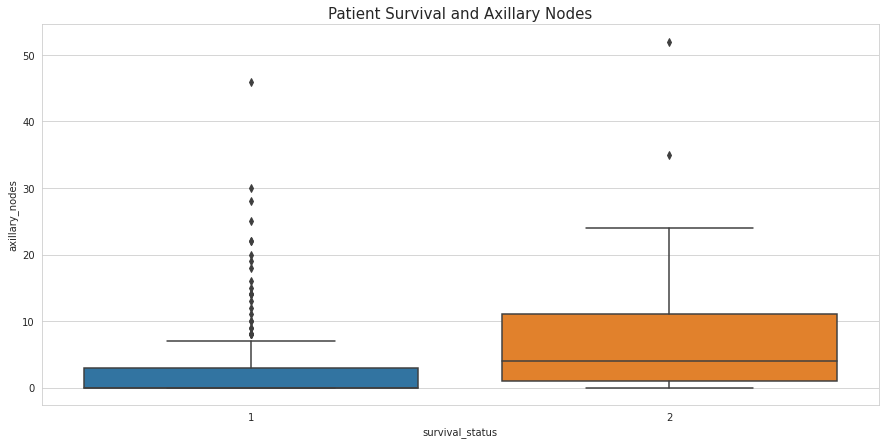

In [11]:
plt.close()
plt.figure(figsize=(15,7))
sns.boxplot(x="survival_status", y="axillary_nodes", data=df)
plt.title("Patient Survival and Axillary Nodes", fontsize=15)
plt.show()

**Observation(s)**
1. Threshold of Longer survival is 0 to 8.
2. Threshold of Shorter survial is 0 to 25.
3. 75th percentile of longer survival is slightly below of 25th percentile of shorter survival.
4. Median of longer survival is 0 while shorter survival is 4.


# Violin Plot

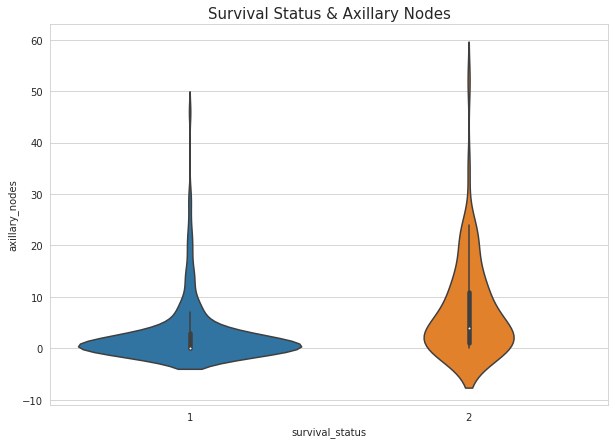

In [12]:
plt.close()
plt.figure(figsize=(10,7))
sns.violinplot(x="survival_status", y="axillary_nodes", data=df, height=10)
plt.title("Survival Status & Axillary Nodes", fontsize=15)
plt.show()

**Observation(s)**
1. Spread is more on 0 in longer survival while in shorter survival it's on 2.
2. Whiskar/Threshold of longer survival is 0 to 7 and 0 to 25 of shorter survival.

# Multivariant Probability density, Contour Plot

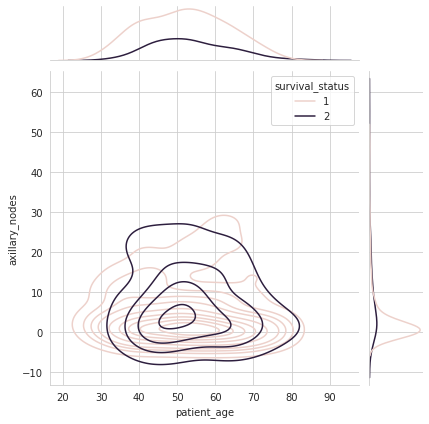

In [13]:
plt.close()
sns.jointplot(x="patient_age", y="axillary_nodes", data=df, kind="kde", hue="survival_status");
plt.show();